# Verifying Central Limit Theorem in regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Synthesize the dataset
Create `1000` random integers between `0`, `100` for `X` and create `y` such that
$$
y = \beta_{0} + \beta_{1}X + \epsilon
$$
where
$$
\beta_{0} = 30 \ and \ \beta_{1} = 1.8 \ and \ \epsilon \ = \ standard \ normal \ error
$$

In [80]:
rand_1kx = np.random.randint(0,100,1000)
x_mean = np.mean(rand_1kx)
x_sd = np.std(rand_1kx)
x_mean

49.954

In [81]:
pop_intercept = 30
pop_slope = 1.8
error_boost = 10
pop_error = np.random.standard_normal(size = rand_1kx.size) * error_boost
# I added an error booster since without it, the correlation was too high.

y = pop_intercept + pop_slope*rand_1kx + pop_error
y_mean = np.mean(y)
y_sd = np.std(y)
y_mean

119.4183378140413

Make a scatter plot of `X` and `y` variables.

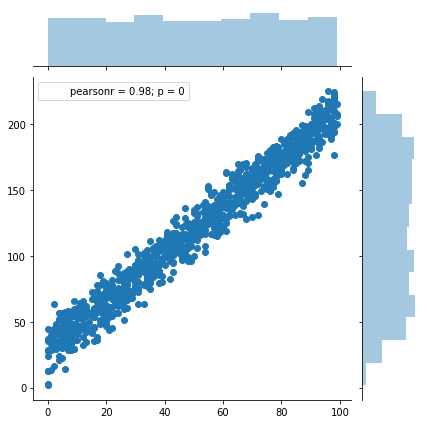

In [82]:
sns.jointplot(rand_1kx, y)

`X` and `y` follow `uniform` distribution, but the error $\epsilon$ is generated from `standard normal distribution` with a boosting factor. Let us plot its histogram to verify the distribution

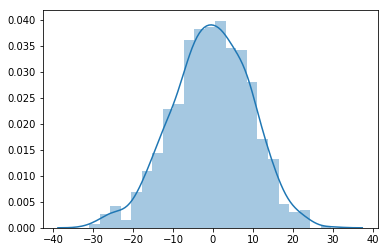

In [83]:
sns.distplot(pop_error)

## Predict using population
Let us predict the coefficients and intercept when using the whole dataset. We will compare this approach with CLT approach of breaking into multiple subsets and averaging the coefficients and intercepts

### Using whole population

In [84]:
from sklearn.linear_model import LinearRegression
X_train_full = rand_1kx.reshape(-1,1)
y_train_full = y.reshape(-1,1)

In [85]:
y_train_full.shape

(1000, 1)

In [86]:
lm.fit(X_train, y_train)

#print the linear model built
predicted_pop_slope = lm.coef_[0][0]
predicted_pop_intercept = lm.intercept_[0]

print("y = " + str(predicted_pop_slope) + "*X" + " + " + str(predicted_pop_intercept))

y = 1.795560991921382*X + 30.718916711669976


### Prediction with 66% of data

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(rand_1kx, y, test_size=0.33)
print(X_train.size)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

670


In [88]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [89]:
y_train.shape

(670, 1)

In [90]:
lm.fit(X_train, y_train)

#print the linear model built
predicted_subset_slope = lm.coef_[0][0]
predicted_subset_intercept = lm.intercept_[0]

print("y = " + str(predicted_subset_slope) + "*X" 
      + " + " + str(predicted_subset_intercept))

y = 1.794887898705644*X + 29.857924099881075


#### Perform predictions and plot the charts

In [95]:
y_predicted = lm.predict(X_test)
residuals = y_test - y_predicted

Fitted vs Actual scatter

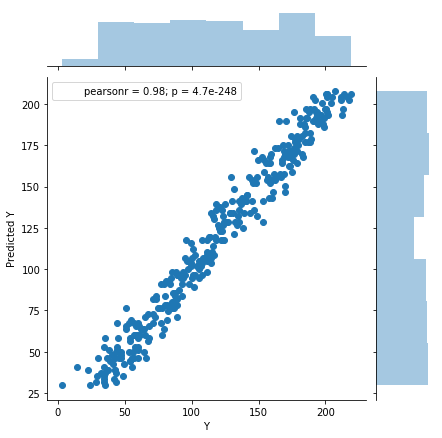

In [96]:
jax = sns.jointplot(y_test, y_predicted)
jax.set_axis_labels(xlabel='Y', ylabel='Predicted Y')

Text(0.5,1,'Distribution of residuals')

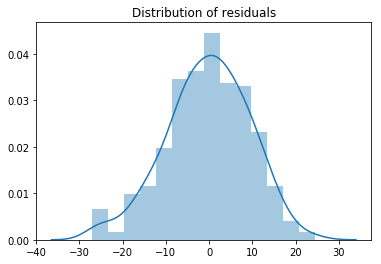

In [98]:
dax = sns.distplot(residuals)
dax.set_title('Distribution of residuals')

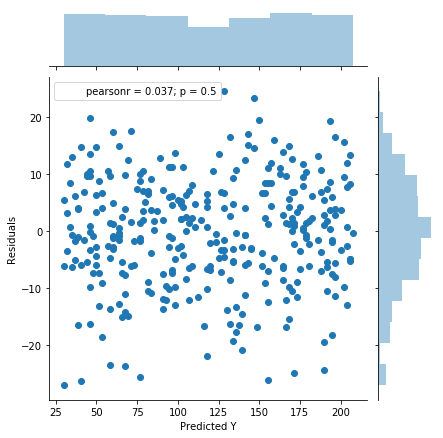

In [99]:
jax = sns.jointplot(y_predicted, residuals)
jax.set_axis_labels(xlabel='Predicted Y', ylabel='Residuals')

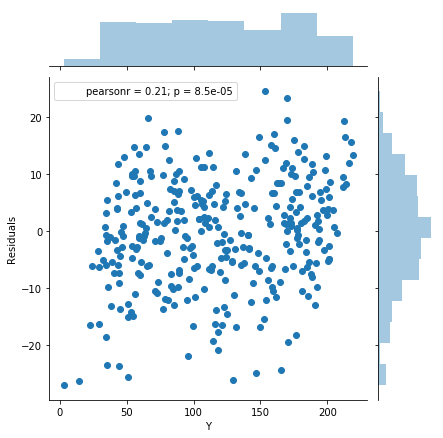

In [100]:
jax = sns.jointplot(y_test, residuals)
jax.set_axis_labels(xlabel='Y', ylabel='Residuals')

## Predict using multiple samples

In [101]:
pop_df = pd.DataFrame(data={'x':rand_1kx, 'y':y})
pop_df.head()

x           y
0  38   85.149359
1  58  130.858406
2  15   67.280103
3  56  125.509595
4  19   55.793980

In [102]:
pop_df.shape

(1000, 2)

### Select 50 samples of size 200 and perform regression

In [103]:
sample_slopes = []
sample_intercepts = []

for i in range(0,50):
    # perform a choice on dataframe index
    sample_index = np.random.choice(pop_df.index, size=50)
    
    # select the subset using that index
    sample_df = pop_df.iloc[sample_index]
    
    # convert to numpy and reshape the matrix for lm.fit
    sample_x = np.array(sample_df['x']).reshape(-1,1)
    sample_y = np.array(sample_df['y']).reshape(-1,1)
    
    lm.fit(X=sample_x, y=sample_y)
    
    sample_slopes.append(lm.coef_[0][0])
    sample_intercepts.append(lm.intercept_[0])

Plot the distribution of sample slopes and intercepts

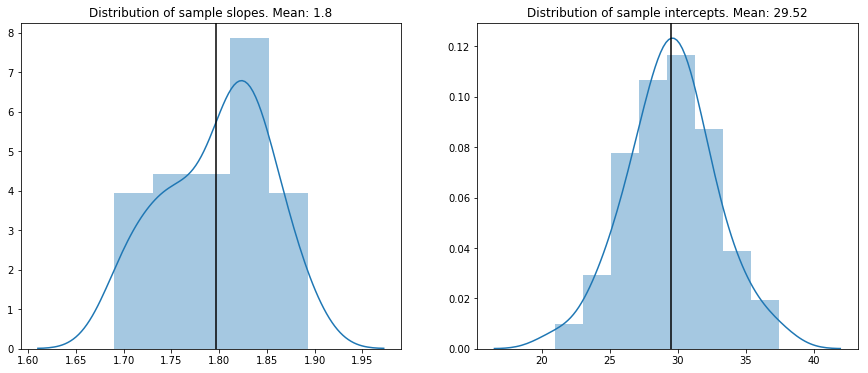

In [104]:
mean_sample_slope = np.mean(sample_slopes)
mean_sample_intercept = np.mean(sample_intercepts)

fig, ax = plt.subplots(1,2, figsize=(15,6))

# plot sample slopes
sns.distplot(sample_slopes, ax=ax[0])
ax[0].set_title('Distribution of sample slopes. Mean: ' 
                + str(round(mean_sample_slope, 2)))
ax[0].axvline(mean_sample_slope, color='black')

# plot sample slopes
sns.distplot(sample_intercepts, ax=ax[1])
ax[1].set_title('Distribution of sample intercepts. Mean: ' 
                + str(round(mean_sample_intercept,2)))
ax[1].axvline(mean_sample_intercept, color='black')

## Conclusion
Here we compare the coefficients and intercepts obtained by different methods to see how CLT adds up.

In [114]:
print("Predicting using population")
print("----------------------------")
print("Error in intercept: {}".format(pop_intercept - predicted_pop_intercept))
print("Error in slope: {}".format(pop_slope - predicted_pop_slope))

print("\n\nPredicting using subset")
print("----------------------------")
print("Error in intercept: {}".format(pop_intercept - predicted_subset_intercept))
print("Error in slope: {}".format(pop_slope - predicted_subset_slope))

print("\n\nPredicting using a number of smaller samples")
print("------------------------------------------------")
print("Error in intercept: {}".format(pop_intercept - mean_sample_intercept))
print("Error in slope: {}".format(pop_slope - mean_sample_slope))

Predicting using population
----------------------------
Error in intercept: -0.7189167116699764
Error in slope: 0.0044390080786180786


Predicting using subset
----------------------------
Error in intercept: 0.14207590011892535
Error in slope: 0.0051121012943560196


Predicting using a number of smaller samples
------------------------------------------------
Error in intercept: 0.4823977050074646
Error in slope: 0.002971759530004725


As we can see, error in quite small in all 3 cases, especially for `slope`. Prediction by averaging a number of smaller samples gives us much closer slope to population.

For intercept, the least error was with prediction using subset, which is still interesting as prediction using the whole population yielded poorer intercept!

In general, for really large datasets, that **cannot be held in system memory**, we can apply Central Limit Theorem for estimating slope and intercept by averaging over a number of smaller samples.